# Logistic Regression Example

A logistic regression learning algorithm example using TensorFlow library.
This example is using the MNIST database of handwritten digits (http://yann.lecun.com/exdb/mnist/)

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [16]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
batch_size = 100
display_step = 5

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1)) 

# regularized cost
reg_para = 0.3
L2_cost = cost + reg_para *tf.log(tf.reduce_mean(tf.reduce_sum(tf.pow(pred, 2)))) # add log for same order
L1_cost = cost + reg_para *tf.log(tf.reduce_mean(tf.reduce_sum(tf.abs(pred)))) # add log for same order

# Gradient Descent
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(L2_cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(L1_cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [ ]:
# Start training
CV_accuracy = []
CV_epoch = []
train_cost = []
CV_cost = []
test_accuracy = []
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})

            # Compute average loss
            avg_cost += c / total_batch
        train_cost = train_cost + [avg_cost]
        CV_cost = CV_cost + [sess.run(cost, feed_dict = {x: mnist.test.images[:5000], y: mnist.test.labels[:5000]})]
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        
        if ((epoch+1)%10 == 0):
            # Test model
            correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
            # Calculate accuracy for CV and test set
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            cv_acc = accuracy.eval({x: mnist.validation.images, y: mnist.validation.labels})
            test_acc = accuracy.eval({x: mnist.test.images, y: mnist.test.labels})
            CV_accuracy = CV_accuracy + [cv_acc]
            CV_epoch = CV_epoch + [epoch]
            test_accuracy = test_accuracy + [test_acc]
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for test examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Test Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0005 cost= 0.467086814
Epoch: 0010 cost= 0.391695594
Epoch: 0015 cost= 0.364503421
Epoch: 0020 cost= 0.341856282
Epoch: 0025 cost= 0.332903095
Epoch: 0030 cost= 0.323746144
Epoch: 0035 cost= 0.319669512
Epoch: 0040 cost= 0.315062813
Epoch: 0045 cost= 0.311660428
Epoch: 0050 cost= 0.306292826
Epoch: 0055 cost= 0.307175848
Epoch: 0060 cost= 0.298601980
Epoch: 0065 cost= 0.296364154
Epoch: 0070 cost= 0.289909839
Epoch: 0075 cost= 0.291793910
Epoch: 0080 cost= 0.285247524
Epoch: 0085 cost= 0.287135809
Epoch: 0090 cost= 0.284303810
Epoch: 0095 cost= 0.282233437
Epoch: 0100 cost= 0.281269405
Epoch: 0105 cost= 0.280253317
Epoch: 0110 cost= 0.277707915
Epoch: 0115 cost= 0.278153752
Epoch: 0120 cost= 0.277863590
Epoch: 0125 cost= 0.276246198
Epoch: 0130 cost= 0.280705673


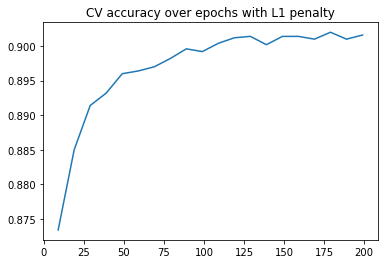

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(CV_epoch[:20], CV_accuracy[:20])
plt.title("CV accuracy over epochs with L1 penalty")

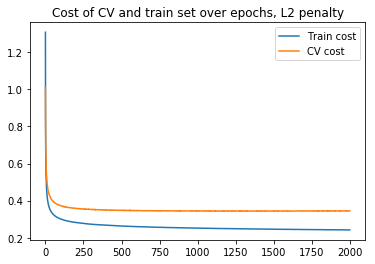

In [10]:
plt.plot(train_cost, label="Train cost")
plt.plot(CV_cost, label="CV cost")
plt.title("Cost of CV and train set over epochs, L1 penalty")
plt.legend()